# Team Members:

Jetendra Mulinti, Goutham Vemula, Prajeeth Nakka

Introduction: Here We are trying create a clean a messy wine data by performing pre-clean EDA & post-clean EDA.

Steps we are following
1. Loading data
2. EDA
3. Data Cleaning
4. Post-Clean EDA

In [1]:
### Import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
import missingno as msno

In [2]:
### load data from csv via github url

github_url = 'https://raw.githubusercontent.com/JetendraMulinti/DAV-6150---DataScience/main/M3%20Practical%20Challenge%20Cleaning%20a%20Messy%20Data%20Set/M3_Data.csv'

wine_df = pd.read_csv(github_url)

#### delete columns unnamed:0 as it is default index column forms while saving csv file
del wine_df['Unnamed: 0']

wine_df.head(2)

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.16,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.16,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0


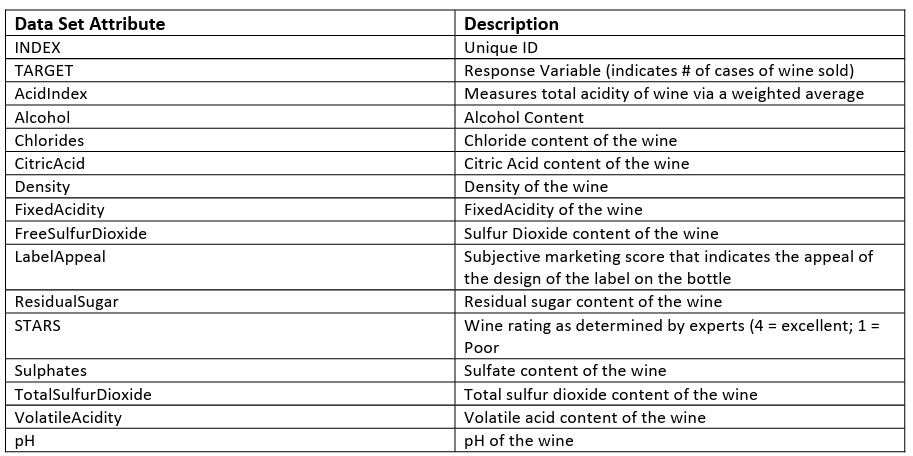

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [4]:
wine_df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [5]:
## Sitation: Help from chatgpt
###### Creating a function that gives univariate analysis on quantitative columns


def Hist_BoxPlotFunction(df, pdf_filename):
    """
    Saves histograms and box plots for all quantitative columns in the DataFrame to a single PDF file
    in the current working directory and displays the plots.
    
    Parameters:
    - df: pandas DataFrame.
    - pdf_filename: String. The filename for the PDF to be saved.
    """
    # Path for saving the PDF in the current working directory
    pdf_path = os.path.join(os.getcwd(), pdf_filename)
    
    quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    with PdfPages(pdf_path) as pdf:
        for col in quantitative_columns:
            fig, axs = plt.subplots(1, 2, figsize=(12, 4))
            
            # Histogram
            sns.histplot(df[col], ax=axs[0], kde=True)
            axs[0].set_title(f'Histogram of {col}')
            
            # Box Plot
            sns.boxplot(x=df[col], ax=axs[1])
            axs[1].set_title(f'Box Plot of {col}')
            
            plt.tight_layout()
            pdf.savefig(fig)  # Save the figure into the PDF
            plt.show()  # Display the plot
            plt.close(fig)  # Close to free up memory

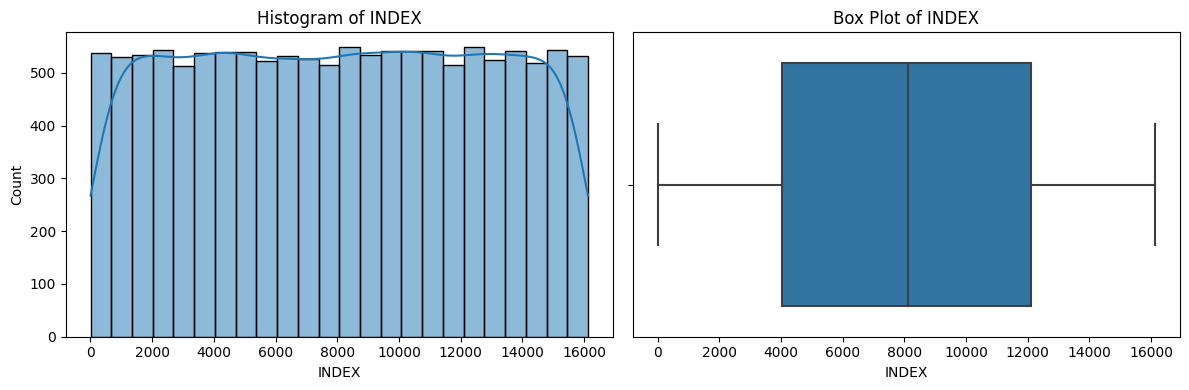

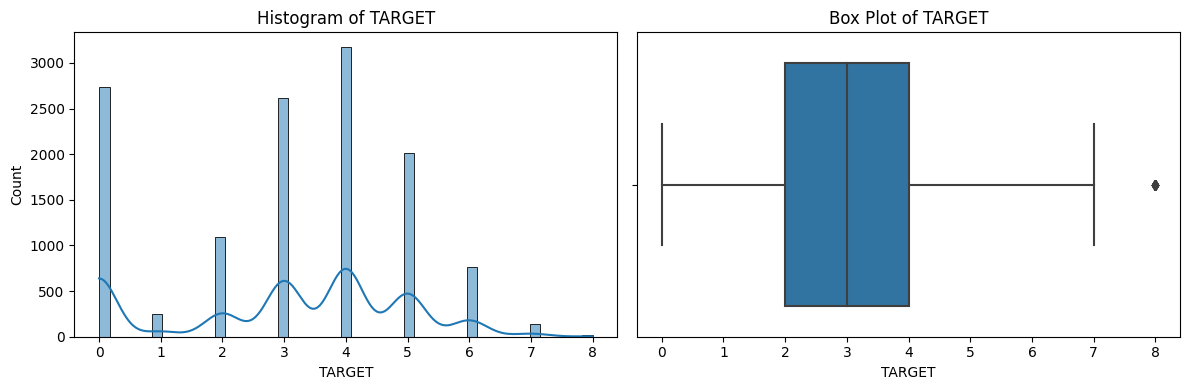

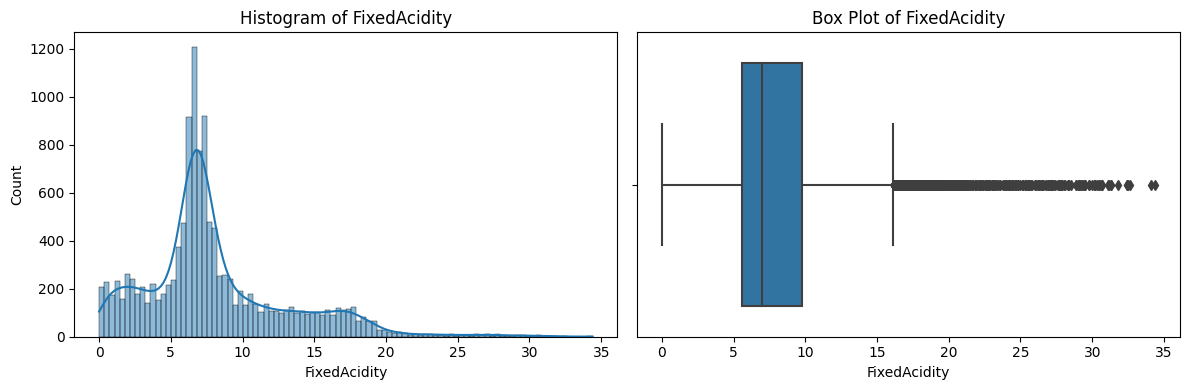

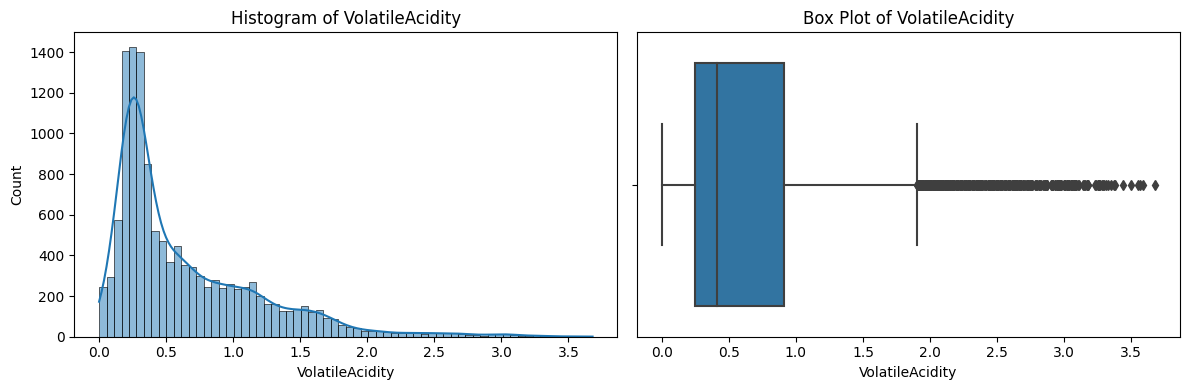

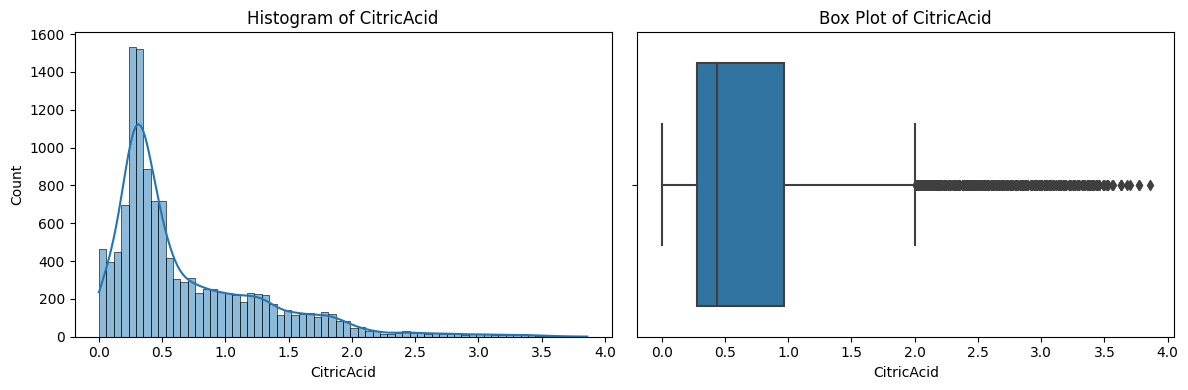

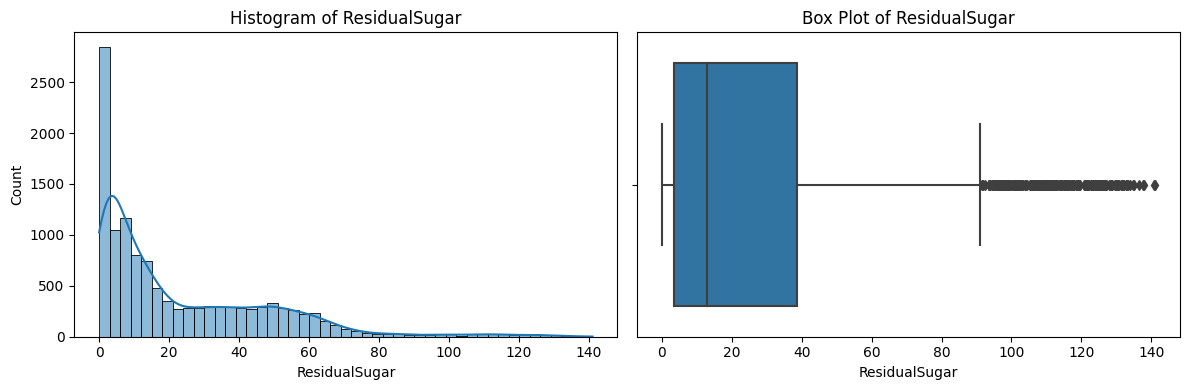

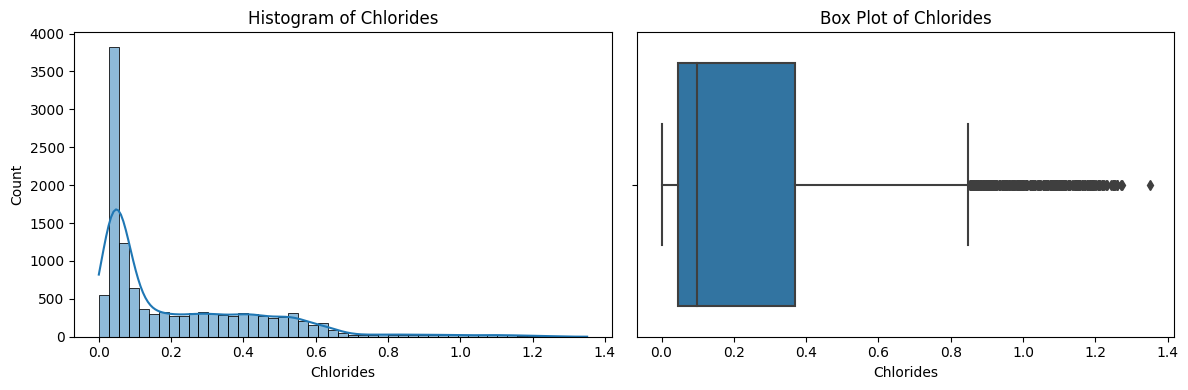

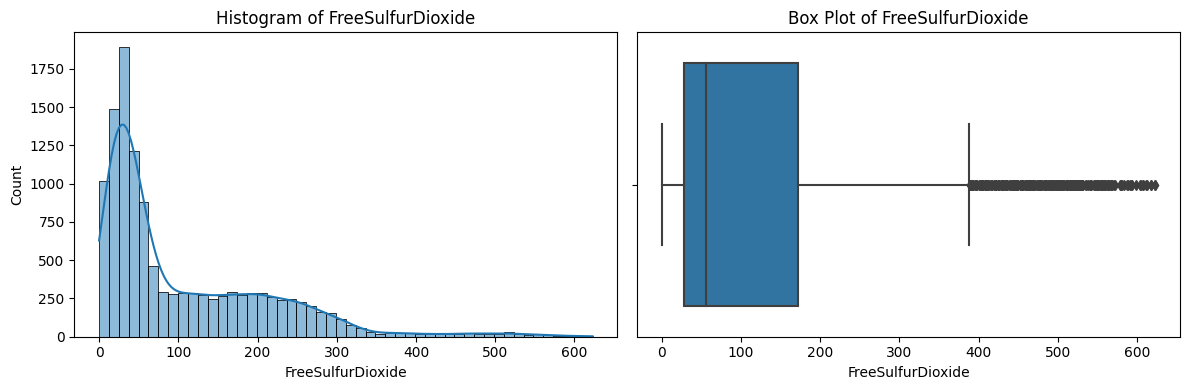

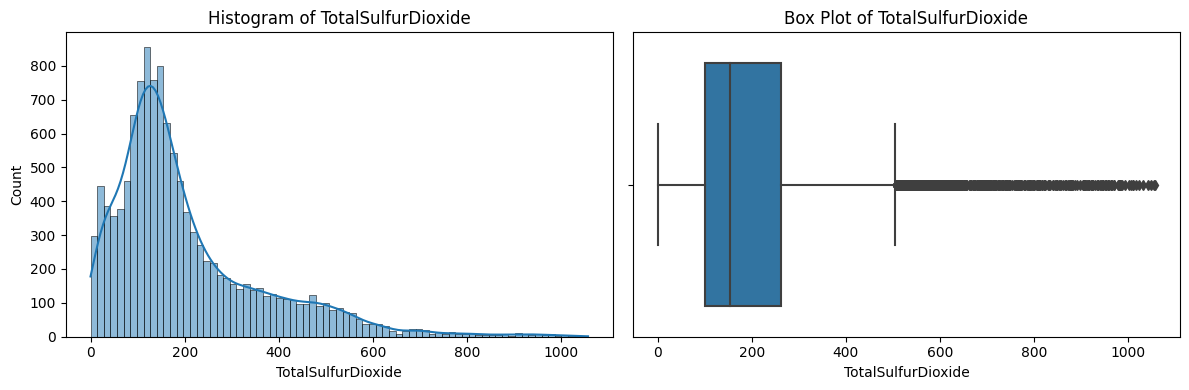

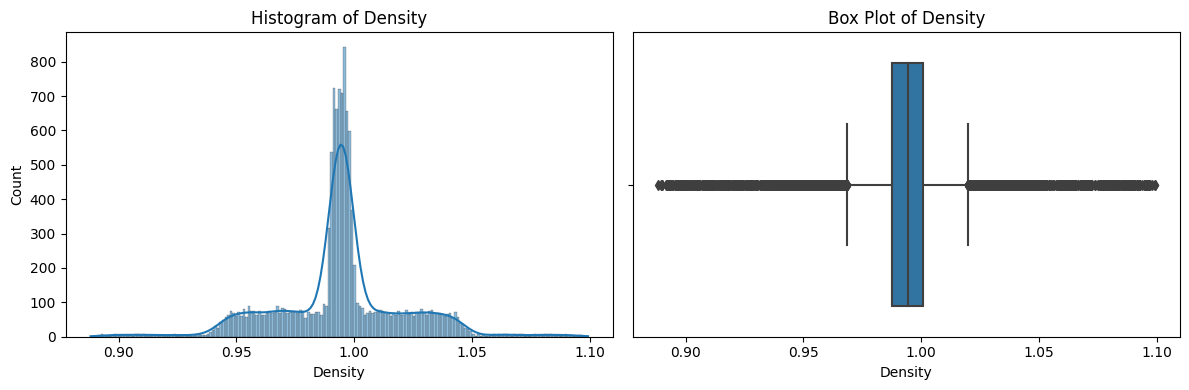

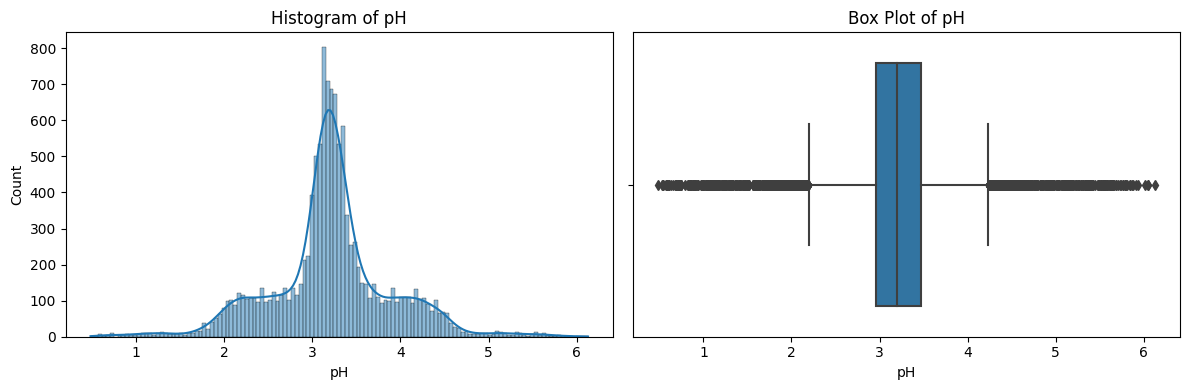

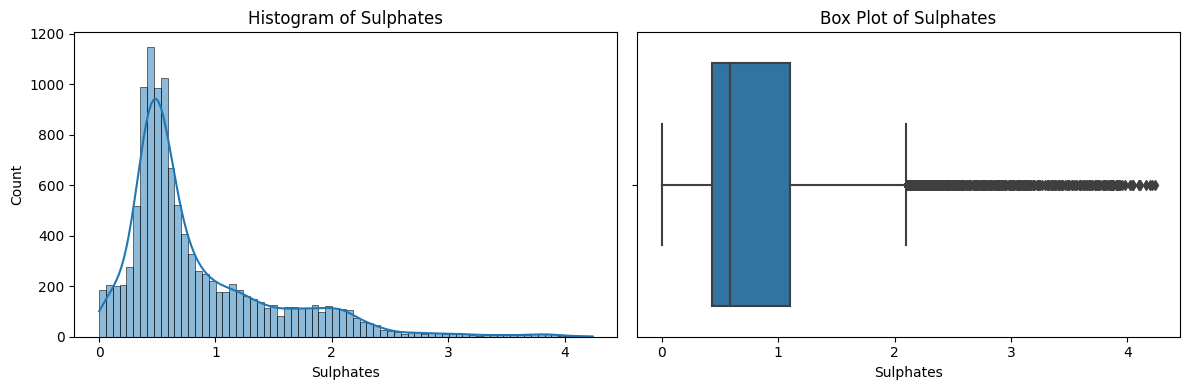

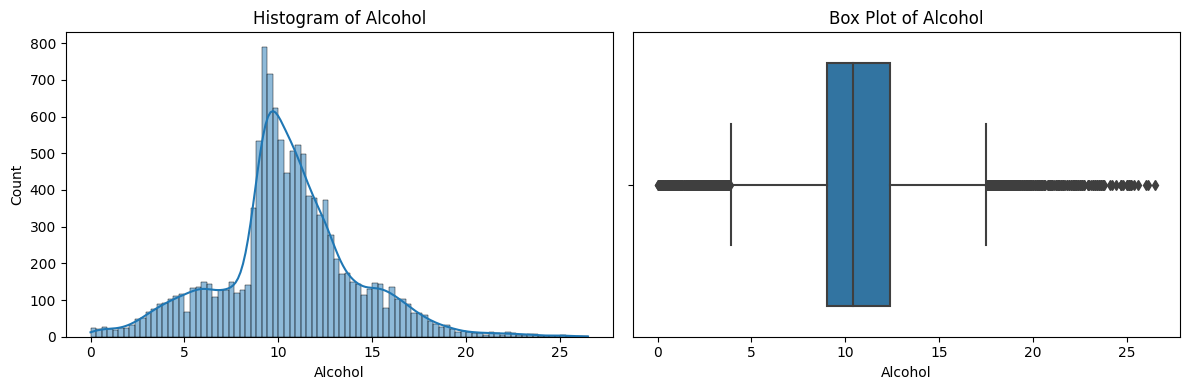

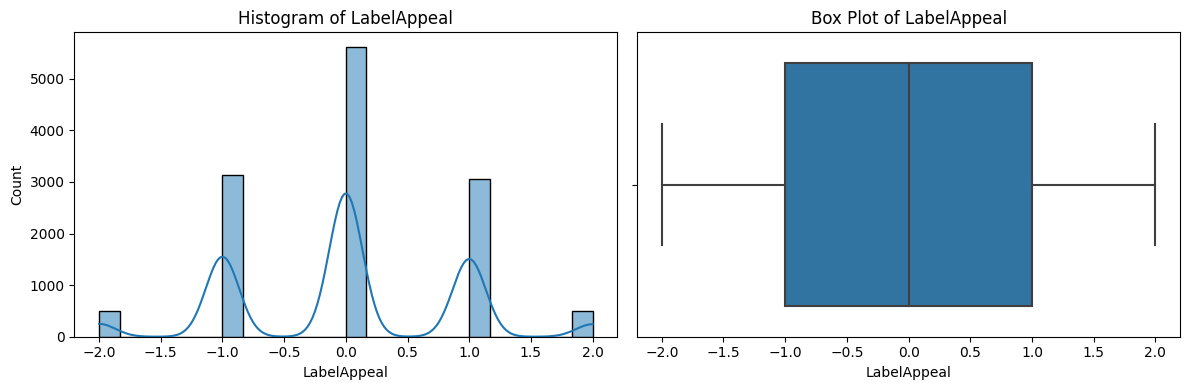

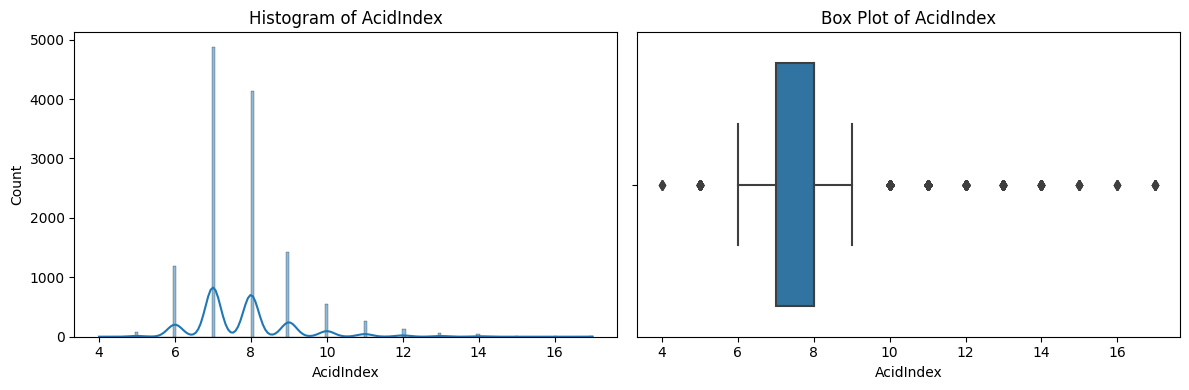

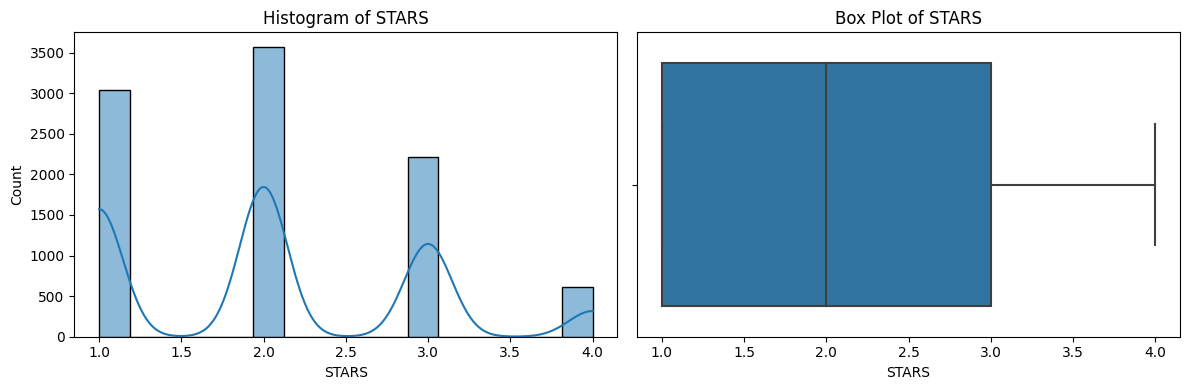

In [6]:
Hist_BoxPlotFunction(wine_df, "wine_df_quantVisuals.pdf")

### Even though we can see the null values from info session & labelAppeal has -ve values in describe, will do EDA atleast Univariate analysis & move the data cleaning for more understanding,

### As all columns are in numeric we wont need to cross check for any other values, but Stars & Label Appeal are categorical variables.

Density histogram looks like a normally distributed data, but it has outliers on both ends.

Target column tells no of cases sold, which tells 4,0,3 cases are sold most. wait 0 cases (need to check this also)

Coming to skewness of the data Most columns has outliers & Right skewed data

# Data Cleaning

In [10]:
#### lets % the missing values

round(wine_df.isnull().sum() / len(wine_df) * 100,2)

INDEX                  0.00
TARGET                 0.00
FixedAcidity           0.00
VolatileAcidity        0.00
CitricAcid             0.00
ResidualSugar          4.81
Chlorides              4.99
FreeSulfurDioxide      5.06
TotalSulfurDioxide     5.33
Density                0.00
pH                     3.09
Sulphates              9.46
Alcohol                5.10
LabelAppeal            0.00
AcidIndex              0.00
STARS                 26.25
dtype: float64

<AxesSubplot: >

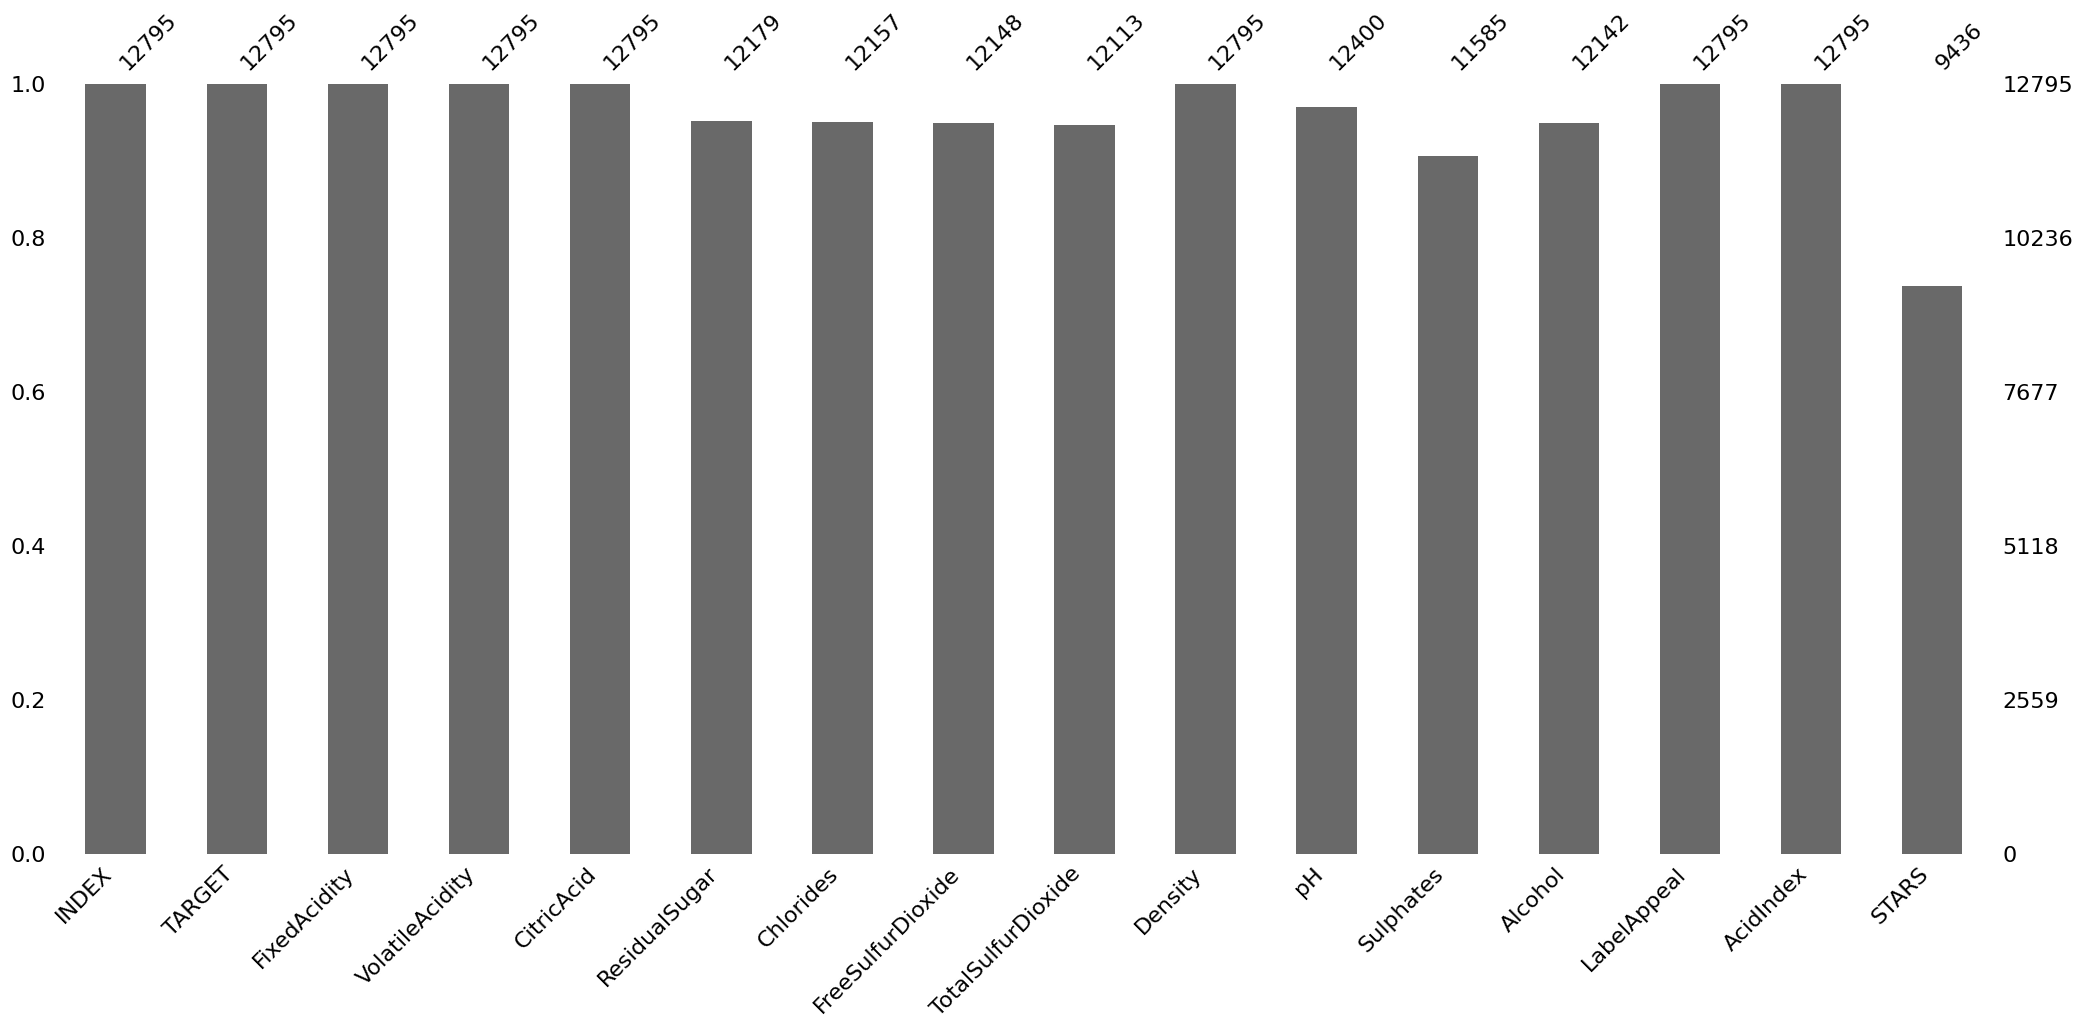

In [9]:
### Lets Plot it

msno.bar(wine_df)

From this plot we can say the missing values are not occured randomly but happened after 75 % of data is filled.

In [ ]:
# ####### I am using correlation matrix for identifying independent columns to dependent columns

# def plot_correlation_matrix(df):

#     # Calculate the correlation matrix
#     corr_matrix = df.corr()
    
#     # Generate a mask for the upper triangle
#     mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#     # Set up the matplotlib figure
#     f, ax = plt.subplots(figsize=(15, 15))

#     # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(230, 20, as_cmap=True)

#     # Draw the heatmap with the mask and correct aspect ratio
#     sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#                 square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#     plt.show()

In [ ]:
# plot_correlation_matrix(wine_df)